In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python

# Những thư viện cần thiết 
import pandas as pd # xử lý dữ liệu, ví dụ đọc file CSV (pd.read_csv).
import numpy as np
import matplotlib.pyplot as plt # trực quan hóa dữ liệu.
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules, apriori 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Exploring data in Python
Ảnh Instacart giỏ hàng 

In [2]:
# Đọc file dữ liệu thứ 1: order_products_train.
order_product = pd.read_csv(r'C:\Users\Oanh Le\Documents\datasets_instacart\order_products_train.csv')
order_product

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1
...,...,...,...,...
1384612,3421063,14233,3,1
1384613,3421063,35548,4,1
1384614,3421070,35951,1,1
1384615,3421070,16953,2,1


File dữ liệu order_products_train gồm:

In [3]:
# Đọc file dữ liệu thứ 2: orders. 
orders = pd.read_csv(r'C:\Users\Oanh Le\Documents\datasets_instacart\orders.csv')
orders

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
...,...,...,...,...,...,...,...
3421078,2266710,206209,prior,10,5,18,29.0
3421079,1854736,206209,prior,11,4,10,30.0
3421080,626363,206209,prior,12,1,12,18.0
3421081,2977660,206209,prior,13,1,12,7.0


File dữ liệu orders gồm:

In [4]:
# Đọc file dữ liệu thứ 3: products. 
products = pd.read_csv(r'C:\Users\Oanh Le\Documents\datasets_instacart\products.csv')
products

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
...,...,...,...,...
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5
49684,49685,En Croute Roast Hazelnut Cranberry,42,1
49685,49686,Artisan Baguette,112,3
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8


File dữ liệu products gồm:

In [5]:
# INNER JOIN 2 DataFrame orders và order_products_train. 
order_train = pd.merge(orders, order_product, on='order_id')

# INNER JOIN 2 DataFrame order_products_train và products. 

train_product = pd.merge(order_product, products, on='product_id')

# INNER JOIN 3 DataFrame với nhau.

instacart_transaction = pd.merge(order_train, products, on='product_id')

# Xuất file "instacart_transaction.csv".
instacart_transaction.to_csv(r'C:\Users\Oanh Le\Documents\datasets_instacart\instacart_transaction.csv', index=False, header=True)
instacart_transaction

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,1187899,1,train,11,4,8,14.0,196,1,1,Soda,77,7
1,2757217,67,train,25,0,11,5.0,196,1,1,Soda,77,7
2,632715,676,train,12,0,13,26.0,196,2,1,Soda,77,7
3,1167274,760,train,5,4,10,8.0,196,2,1,Soda,77,7
4,3347074,804,train,16,3,21,5.0,196,4,0,Soda,77,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1384612,3351563,206110,train,5,3,13,7.0,22165,22,0,Chewy Reduced Sugar Granola Bars Variety Pack,48,14
1384613,2629221,206125,train,14,6,13,30.0,31540,5,0,Plain Flavor Probiotic Acidophilus,70,11
1384614,2721635,206149,train,6,6,10,30.0,44507,2,1,"100% Juice, Rio Red Grapefruit",98,7
1384615,2078948,206155,train,15,3,11,15.0,47814,1,1,Puppy Complete Nutrition Chicken & Beef Dinner...,40,8


In [6]:
# Tải file dữ liệu vừa mới xuất và chỉ lấy những cột cần thiết để chuẩn bị phân tích. 
# Chỉ lấy những cột sau: 
col_insta_trans = ['order_id', 'product_id', 'user_id', 'product_name']
instacart_transaction = pd.read_csv(r'C:\Users\Oanh Le\Documents\datasets_instacart\instacart_transaction.csv', index_col=False, usecols=col_insta_trans)
instacart_transaction

,order_id,user_id,product_id,product_name
0,1187899,1,196,Soda
1,2757217,67,196,Soda
2,632715,676,196,Soda
3,1167274,760,196,Soda
4,3347074,804,196,Soda
...,...,...,...,...
1384612,3351563,206110,22165,Chewy Reduced Sugar Granola Bars Variety Pack
1384613,2629221,206125,31540,Plain Flavor Probiotic Acidophilus
1384614,2721635,206149,44507,"100% Juice, Rio Red Grapefruit"
1384615,2078948,206155,47814,Puppy Complete Nutrition Chicken & Beef Dinner...


In [7]:
instacart_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384617 entries, 0 to 1384616
Data columns (total 4 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   order_id      1384617 non-null  int64 
 1   user_id       1384617 non-null  int64 
 2   product_id    1384617 non-null  int64 
 3   product_name  1384617 non-null  object
dtypes: int64(3), object(1)
memory usage: 42.3+ MB


In [8]:
# Kiểm tra có trị null hay không 
instacart_transaction.isna().sum()

order_id        0
user_id         0
product_id      0
product_name    0
dtype: int64

# Initial exploratory analysis

In [9]:
# Số lượng đơn hàng mà mỗi người dùng trong hơn 200.000 người đã đặt qua app và website Instacart 
order_count = instacart_transaction.groupby('user_id')['order_id'].count().reset_index(name='count')
order_count

,user_id,count
0,1,11
1,2,31
2,5,9
3,7,9
4,8,18
...,...,...
131204,206199,22
131205,206200,19
131206,206203,13
131207,206205,19


In [10]:
# Mỗi sản phẩm có bao nhiêu đơn đặt hàng
product_count = instacart_transaction.groupby('product_id', as_index=False)['order_id'].count()
product_count.rename(columns = {'order_id':'count'},inplace=True)
product_count

,product_id,count
0,1,76
1,2,4
2,3,6
3,4,22
4,5,1
...,...,...
39118,49682,5
39119,49683,2413
39120,49686,7
39121,49687,1


In [11]:
# # Top 10 sản phẩm (product_name) được mua nhiều nhất. 
top10_count = instacart_transaction[['order_id','product_name']].groupby('product_name',as_index=False)['order_id'].count(
    ).sort_values(by='order_id',ascending=False)
top10_count.rename(columns = {'order_id':'count'},inplace=True)
top10_count.head(10)

,product_name,count
2814,Banana,18726
2641,Bag of Organic Bananas,15480
25128,Organic Strawberries,10894
22496,Organic Baby Spinach,9784
17475,Large Lemon,8135
22465,Organic Avocado,7409
23736,Organic Hass Avocado,7293
33836,Strawberries,6494
18278,Limes,6033
24656,Organic Raspberries,5546


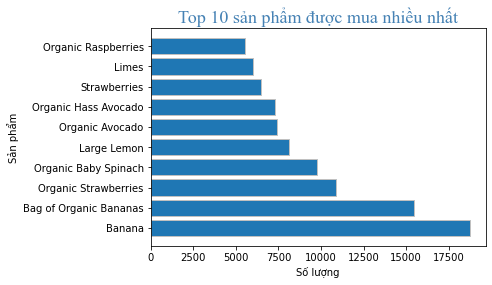

In [12]:
y_axis = top10_count['product_name'].head(10)
x_axis = top10_count['count'].head(10)

plt.barh(y_axis,x_axis, edgecolor='Silver')

plt.title('Top 10 sản phẩm được mua nhiều nhất', color='steelblue',
fontfamily='times new roman',fontsize=18)
plt.ylabel('Sản phẩm')
plt.xlabel('Số lượng')

plt.show()

In [13]:
# Số lượng trung bình sản phẩm được bán ra.
purchase_count = instacart_transaction.groupby('order_id')['product_name'].count()
df = pd.DataFrame(purchase_count)
df.mean(axis=0)

product_name    10.552759
dtype: float64

# Chuẩn bị dữ liệu để phân tích giỏ hàng

In [14]:
# Bước đầu chuyển từ DataFrame sang transaction data để phân tích giỏ hàng 
# Đếm unique order IDs.
order_id = instacart_transaction['order_id'].unique()

# Tạo danh sách để chuyển DataFrame thành transaction data 
transaction = [list(instacart_transaction[instacart_transaction['order_id'] == u].product_name) for u in order_id]

"""
Danh sách dưới đây là gồm những đơn hàng (order_id) unique
Mỗi danh sách được ví như một giỏ hàng của khách hàng đã mua 
Và mỗi danh sách được phân cách bằng dấu []
"""
# In danh sách vừa tạo. 
transaction

[['Soda',
  'Organic String Cheese',
  '0% Greek Strained Yogurt',
  'XL Pick-A-Size Paper Towel Rolls',
  'Milk Chocolate Almonds',
  'Pistachios',
  'Cinnamon Toast Crunch',
  'Aged White Cheddar Popcorn',
  'Organic Whole Milk',
  'Organic Half & Half',
  'Zero Calorie Cola'],
 ['Soda', 'Bag of Organic Bananas', 'Clementines'],
 ['Soda', 'Smartwater', 'Organic Low Fat Milk'],
 ['Soda', 'Spring Water', 'Apples'],
 ['Soda',
  'Zero Calorie Cola',
  'Sparkling Water',
  'Chocolate Powder',
  'Vegetable Oil',
  'Original Dried Cranberries'],
 ['Soda', 'Ginger Ale', 'Lemon-Lime Soda'],
 ['Soda',
  'Organic Simply Naked Pita Chips',
  'Sparkling Natural Mineral Water',
  'Corn Tortillas',
  'Orange & Lemon Flavor Variety Pack Sparkling Fruit Beverage',
  '8\\" Flour Tortillas De Harina'],
 ['Soda',
  'Eggo Homestyle Waffles',
  'Organic Milk',
  'Original Club Crackers',
  'Fresh Cut Golden Sweet Whole Kernel Corn',
  'No Pulp Calcium & Vitamin D Pure Orange Juice',
  'Beef Franks',
  'Co

In [15]:
"""
Dưới đây là danh sách (giỏ hàng) gồm những sản phẩm (product_name) 
mà khách hàng hay mua cùng với nhau. 
"""
transaction[0] 

['Soda',
 'Organic String Cheese',
 '0% Greek Strained Yogurt',
 'XL Pick-A-Size Paper Towel Rolls',
 'Milk Chocolate Almonds',
 'Pistachios',
 'Cinnamon Toast Crunch',
 'Aged White Cheddar Popcorn',
 'Organic Whole Milk',
 'Organic Half & Half',
 'Zero Calorie Cola']

In [16]:
"""
Tiếp tục danh sách vừa tạo sang dạng onehot encoding để tiến hành phân tích giỏ hàng 
Mỗi cột sẽ là một trong 49,653 sản phẩm (product_name)
Với giá trị False ~ (0): không xuất hiện trong giỏ hàng 
            True  ~ (1): có xuất hiện trong giỏ hàng 
            * Giỏ hàng ở đây chỉ 1 giỏ hàng của 1 khách hàng (unique).
"""
# Instantiate transaction encoder.
encoder = TransactionEncoder()
# One-hot encode instacart_transaction.
onehot = encoder.fit(transaction).transform(transaction)
# Sử dụng product_name là cột headers.
onehot = pd.DataFrame(onehot, columns = encoder.columns_)
# Print onehot header.
onehot

,#2 Coffee Filters,#2 Cone White Coffee Filters,#2 Mechanical Pencils,#4 Natural Brown Coffee Filters,& Go! Hazelnut Spread + Pretzel Sticks,+Energy Black Cherry Vegetable & Fruit Juice,0 Calorie Acai Raspberry Water Beverage,0 Calorie Fuji Apple Pear Water Beverage,0 Calorie Strawberry Dragonfruit Water Beverage,0% Fat Black Cherry Greek Yogurt y,...,with Sweet Cinnamon Bunches Cereal,with Xylitol Cinnamon 18 Sticks Sugar Free Gum,with Xylitol Island Berry Lime 18 Sticks Sugar Free Gum,with Xylitol Minty Sweet Twist 18 Sticks Sugar Free Gum,with Xylitol Original Flavor 18 Sticks Sugar Free Gum,with Xylitol Unwrapped Original Flavor 50 Sticks Sugar Free Gum,with Xylitol Unwrapped Spearmint 50 Sticks Sugar Free Gum,with Xylitol Watermelon Twist 18 Sticks Sugar Free Gum,with a Splash of Mango Coconut Water,with a Splash of Pineapple Coconut Water
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131204,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
131205,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
131206,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
131207,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [17]:
onehot.mean()

#2 Coffee Filters                                                  0.000168
#2 Cone White Coffee Filters                                       0.000008
#2 Mechanical Pencils                                              0.000008
#4 Natural Brown Coffee Filters                                    0.000046
& Go! Hazelnut Spread + Pretzel Sticks                             0.000076
                                                                     ...   
with Xylitol Unwrapped Original Flavor 50 Sticks Sugar Free Gum    0.000030
with Xylitol Unwrapped Spearmint 50 Sticks Sugar Free Gum          0.000015
with Xylitol Watermelon Twist 18 Sticks Sugar Free Gum             0.000046
with a Splash of Mango Coconut Water                               0.000030
with a Splash of Pineapple Coconut Water                           0.000030
Length: 39123, dtype: float64

In [18]:
# Tính toán giá trị support. 
support_bananas_bags = np.logical_and(onehot['Banana'], onehot['Bag of Organic Bananas']).mean()
support_bananas = onehot['Bananas'].mean()
support_bags = onehot['Bag of Organic Bananas'].mean()
# Tính toán giá trị confidence and lift.
confidence = support_bananas_bags / support_bananas
lift = support_bananas_bags / (support_bananas * support_bags)
# In kết quả.
print(' Giá trị support cho sản phẩm "Bananas" là: %f\n' %support_bananas, 'Giá trị support của sản phẩm "Bag of Organic Bananas" là: %f\n' %support_bags, 'Giá trị confidence là: %f\n' %confidence, 'Giá trị lift là: %f\n' %lift)

 Giá trị support cho sản phẩm "Bananas" là: 0.002744
 Giá trị support của sản phẩm "Bag of Organic Bananas" là: 0.117980
 Giá trị confidence là: 0.077778
 Giá trị lift là: 0.659247



Ý nghĩa của các chỉ số này: 

In [19]:
# Tính toán chỉ số leverage. 
# Tính toán trước chỉ số support của Bananas và Limes.
support_bananas_limes = np.logical_and(onehot['Bananas'], onehot['Limes']).mean()
# Tính toán chỉ số của Bananas. 
support_bananas = onehot['Bananas'].mean()
# Tính toán chỉ số support của Limes. 
support_limes = onehot['Limes'].mean()
# Tính toán chỉ số leverage
leverage = support_bananas_limes - support_limes * support_bananas
print('Giá trị leverage là: %f' %leverage)

Giá trị leverage là: -0.000111


In [20]:
# Tính toán chỉ số conviction. 
# Tính toán chỉ số support cho sản phẩm Bananas, Bags of Organic Bananas, và Limes. 
#support_bananas_limes = np.logical_and(onehot['Bananas'], onehot['Limes']).mean()
# Tính toán chỉ số support cho !Bags of Organic Bananas.
#support_not_bags = 1.0 - onehot['Bag of Organic Bananas'].mean()
# Tính toán chỉ số support của Bananas và !Bags of Organic Bananas
#support_bana_not_bag = support_bananas - support

In [21]:
# Tính toán frequent itemsets
frequent_itemsets = apriori(onehot, min_support = 0.0005, max_len = 4, use_colnames = True)
# In số lượng itemsets
print(len(frequent_itemsets))

MemoryError: Unable to allocate 1.57 TiB for an array with shape (6557631, 2, 131209) and data type bool

# Tài liệu tham khảo 
https://pbpython.com/market-basket-analysis.html
https://www.hackerearth.com/blog/developers/beginners-tutorial-apriori-algorithm-data-mining-r-implementation/
https://www.datacamp.com/community/tutorials/market-basket-analysis-r
https://www.kdnuggets.com/2019/12/market-basket-analysis.html
https://www2.deloitte.com/cz/en/pages/deloitte-analytics/solutions/market-basket-analysis.html
https://www.analyticsvidhya.com/blog/2021/10/end-to-end-introduction-to-market-basket-analysis-in-r/

https://www.youtube.com/watch?v=aslTl6i-hpQ
https://www.youtube.com/watch?v=guVvtZ7ZClw
https://www.youtube.com/watch?v=SVM_pX0oTU8
* https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python
